In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [10]:
from sklearn.metrics import accuracy_score

In [11]:
pd.set_option('future.no_silent_downcasting', True)

In [12]:
file_path = r"D:\8th Semester\BTECH-PROJECT\dataset\Chronic_Kidney_Dsease_data.csv"
df = pd.read_csv(file_path)

In [13]:
df



,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,...,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,...,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,...,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,...,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1,Confidential


In [14]:
df.info()
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [15]:
df['Diagnosis'].value_counts()


Diagnosis
1    1524
0     135
Name: count, dtype: int64

In [16]:
df['Gender'].value_counts()


Gender
1    855
0    804
Name: count, dtype: int64

In [17]:
df1 = df.copy()

In [18]:
Column = 'Diagnosis'

# Convert column to integer first (to ensure 1 and 0 are treated as numbers)
df1[Column] = df1[Column].astype(int)

# Now replace 1 → 'yes' and 0 → 'no'
df1[Column] = df1[Column].replace({1: 'yes', 0: 'no'})

# Convert everything to lowercase (just in case)
df1[Column] = df1[Column].astype(str).str.strip().str.lower()

# Print class distribution
class_counts = df1[Column].value_counts()
print("Class Distribution:\n", class_counts)

# Expected values
expected_yes, expected_no = 'yes', 'no'

# Check if both categories exist
if expected_yes in class_counts and expected_no in class_counts:
    min_count = min(class_counts[expected_yes], class_counts[expected_no])

    # Perform undersampling only if both categories exist
    df_no = df1[df1[Column] == expected_no].sample(min_count, random_state=42)
    df_yes = df1[df1[Column] == expected_yes].sample(min_count, random_state=42)

    # Combine and shuffle
    balanced_df = pd.concat([df_no, df_yes]).sample(frac=1, random_state=42).reset_index(drop=True)

    print("Balanced Class Distribution:\n", balanced_df[Column].value_counts())
else:
    print(f"Error: One or both expected values ('{expected_yes}', '{expected_no}') are missing in the column.")


Class Distribution:
 Diagnosis
yes    1524
no      135
Name: count, dtype: int64
Balanced Class Distribution:
 Diagnosis
no     135
yes    135
Name: count, dtype: int64


In [19]:
if 'balanced_df' in locals():  # Check if balanced_df was created
    df2 = balanced_df.copy()
    print("Balanced dataset copied successfully.")
else:
    print("Error: balanced_df was not created. Check previous steps for issues.")


Balanced dataset copied successfully.


Cleaning Dataset

In [20]:
df2['Gender'].value_counts()

Gender
0    140
1    130
Name: count, dtype: int64

PEARSON CORRELATION


Top 10 Features Impacting CKD Diagnosis:

SerumCreatinine      0.201125
GFR                  0.175988
Itching              0.100652
FastingBloodSugar    0.095694
MuscleCramps         0.094811
BUNLevels            0.093097
ProteinInUrine       0.090014
SystolicBP           0.083528
HbA1c                0.059999
BMI                  0.055222
Name: Diagnosis, dtype: float64


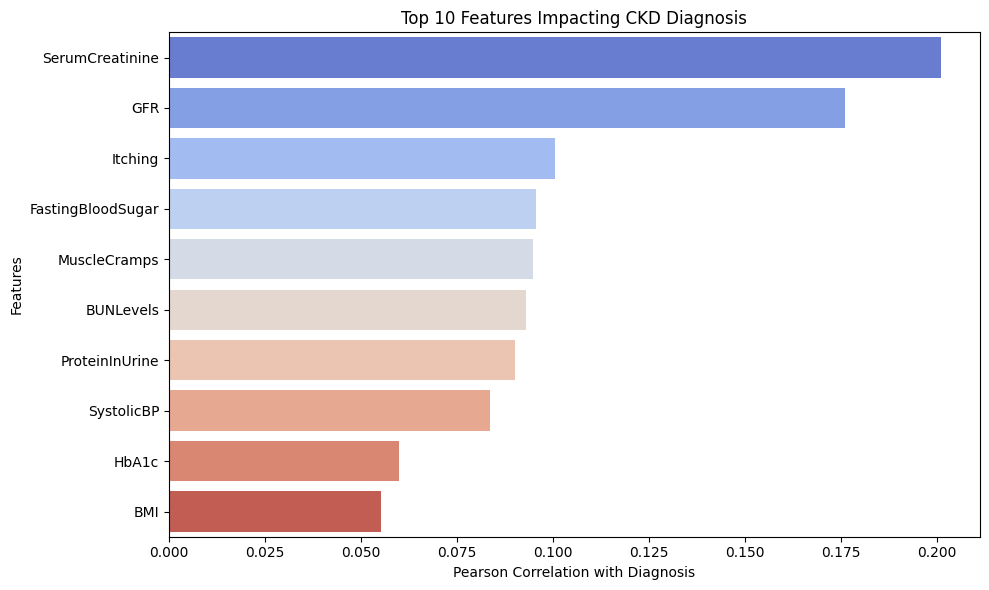

In [21]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Load the balanced dataset from the specified path
file_path = r"D:\8th Semester\BTECH-PROJECT\dataset\Chronic_Kidney_Dsease_data.csv"
df = pd.read_csv(file_path)

# 🔹 Convert "Diagnosis" to numerical values (1 for CKD, 0 for Non-CKD)
df['Diagnosis'] = df['Diagnosis'].astype('category').cat.codes

# 🔹 Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# 🔹 Drop 'PatientID' if it's present (case-sensitive!)
df_numeric = df_numeric.drop(columns=['PatientID'], errors='ignore')

# 🔹 Compute the Pearson correlation matrix
correlation_matrix = df_numeric.corr(method='pearson')

# 🔹 Select correlations with the target variable (Diagnosis)
diagnosis_correlation = correlation_matrix['Diagnosis'].abs().sort_values(ascending=False)

# 🔹 Select the top 10 most correlated features (excluding "Diagnosis" itself)
top_10_features = diagnosis_correlation.index[1:11]
top_10_correlations = diagnosis_correlation[1:11]

# 🔹 Display the top 10 features and their correlation values
print("\nTop 10 Features Impacting CKD Diagnosis:\n")
print(top_10_correlations)

# 🔹 Plot Bar Graph for Top 10 Features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_correlations.values, y=top_10_correlations.index, hue=top_10_correlations.index, palette='coolwarm', legend=False)
plt.xlabel("Pearson Correlation with Diagnosis")
plt.ylabel("Features")
plt.title("Top 10 Features Impacting CKD Diagnosis")
plt.tight_layout()
plt.show()




FILTERING

In [22]:
import pandas as pd

# Create a copy of the original dataset
df_cleaned = df.copy()

# Drop the "DoctorInCharge" column
if "DoctorInCharge" in df_cleaned.columns:
    df_cleaned.drop(columns=["DoctorInCharge"], inplace=True)

# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Remove columns with very low variance (almost constant values)
low_variance_threshold = 0.01
low_variance_cols = numeric_df.var()[numeric_df.var() < low_variance_threshold].index
df_cleaned.drop(columns=low_variance_cols, inplace=True)

# Remove highly correlated features (above 0.9 correlation)
correlation_matrix = numeric_df.corr()
high_corr_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:  # Correlation threshold
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

df_cleaned.drop(columns=high_corr_features, inplace=True)

print("Filtering Completed! Removed 'DoctorInCharge', low variance & highly correlated features.")
print("Features after filtering:", df_cleaned.columns.tolist())


Filtering Completed! Removed 'DoctorInCharge', low variance & highly correlated features.
Features after filtering: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemical

DATA PREPROCESSING

In [23]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import pandas as pd

# Make a copy to avoid modifying the original dataset
df_cleaned = df.copy()

# Step 1: Handle Missing Values
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':  # Categorical column
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])  # Fill with mode
    else:  # Numerical column
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())  # Fill with mean

# Step 2: Separate Features & Target Variable
target_column = 'Diagnosis'  # Ensure this matches the actual column name
if target_column in df_cleaned.columns:
    y = df_cleaned[target_column]  # Target variable
    X = df_cleaned.drop(columns=[target_column])  # Features
else:
    print("Warning: Target variable 'Diagnosis' not found!")

# Step 3: Normalize Numerical Features
numerical_features = X.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Step 4: Encode Categorical Features
categorical_features = X.select_dtypes(include=['object']).columns

for col in categorical_features:
    if X[col].nunique() == 2:
        # Binary categorical feature → Label Encode
        encoder = LabelEncoder()
        X[col] = encoder.fit_transform(X[col])
    else:
        # Multi-class categorical feature → One-Hot Encode
        X = pd.get_dummies(X, columns=[col], drop_first=True)  # Avoids dummy variable trap

# Final processed dataset
print("Feature Engineering Completed Successfully!")
print("Final Features after Feature Engineering:", X.columns.tolist())

# Now 'X' contains the processed features, and 'y' is the target variable.


Feature Engineering Completed Successfully!
Final Features after Feature Engineering: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality', 'MedicalCh

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Make a copy to avoid modifying the original dataset
df_cleaned = df.copy()

# 🔹 Restore 'PatientID' if it was removed
if 'PatientID' not in df_cleaned.columns:
    print(" Warning: 'PatientID' column not found in df. Ensure it is present in the original dataset.")
else:
    print(" 'PatientID' restored in df_cleaned.")

# Step 1: Handle Missing Values
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':  # Categorical column
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])  # Fill with mode
    else:  # Numerical column
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())  # Fill with mean

# Step 2: Preserve 'PatientID' for later use
patient_ids = df_cleaned["PatientID"]

# Step 3: Drop 'PatientID' from training features
df_cleaned.drop(columns=["PatientID"], inplace=True)
print(" 'PatientID' removed from training features and stored separately.")

# Step 4: Normalize Numerical Features
numerical_features = df_cleaned.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Step 5: Convert Categorical Features (Yes/No → 1/0)
categorical_features = df_cleaned.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_features:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

print(" Feature Engineering Completed Successfully!")
print("Final Features for Training:", df_cleaned.columns.tolist())


 'PatientID' restored in df_cleaned.
 'PatientID' removed from training features and stored separately.
 Feature Engineering Completed Successfully!
Final Features for Training: ['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'He

FEATURE SELECTION

In [25]:

# Drop 'DoctorInCharge' (as it contains confidential data)
if "DoctorInCharge" in df_cleaned.columns:
    df_cleaned.drop(columns=["DoctorInCharge"], inplace=True)
    print(" 'DoctorInCharge' removed from dataset.")

#  Separate Target Variable
target_column = "Diagnosis"
X = df_cleaned.drop(columns=[target_column])  # Features
y = df_cleaned[target_column]  # Target Variable
print(f" Target Variable: '{target_column}' separated from features.")

#  Check & Remove Highly Correlated Features (Threshold: 0.9)
correlation_matrix = X.corr().abs()
high_corr_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.9:  # High correlation threshold
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

X.drop(columns=high_corr_features, inplace=True)
print(f" Removed Highly Correlated Features: {list(high_corr_features)}")

#  Final Features After Selection
print("Final Features After Selection:", X.columns.tolist())


 'DoctorInCharge' removed from dataset.
 Target Variable: 'Diagnosis' separated from features.
 Removed Highly Correlated Features: []
Final Features After Selection: ['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsEx

TRAIN-TEST-SPLIT

In [26]:
# Reload 'PatientID' from the original dataset
if "PatientID" not in df_cleaned.columns:
    df_cleaned["PatientID"] = df["PatientID"]
    print(" 'PatientID' restored in df_cleaned.")
else:
    print(" 'PatientID' already exists in df_cleaned.")


 'PatientID' restored in df_cleaned.


TRAIN AND TEST

In [27]:
from sklearn.model_selection import train_test_split

# 🔹 Step 1: Preserve 'PatientID' for later analysis
patient_ids = df_cleaned["PatientID"]

# 🔹 Step 2: Define Features (X) and Target (y)
X = df_cleaned.drop(columns=["PatientID", "Diagnosis"])  # Exclude PatientID & Target
y = df_cleaned["Diagnosis"]  # Target variable (CKD diagnosis)

# 🔹 Step 3: Split into Training & Testing Sets
X_train, X_test, y_train, y_test, patient_ids_train, patient_ids_test = train_test_split(
    X, y, patient_ids, test_size=0.2, random_state=42, stratify=y
)

# 🔹 Confirm split
print(f" Data split completed!")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


 Data split completed!
Training samples: 1327, Testing samples: 332


MODEL TRAINING

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12176\3762082923.py:20: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  scale_pos_weight=np.bincount(y_resampled)[0] / np.bincount(y_resampled)[1],


[LightGBM] [Info] Number of positive: 1219, number of negative: 1219
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10076
[LightGBM] [Info] Number of data points in the train set: 2438, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

 LightGBM Model Accuracy: 0.9127

Confusion Matrix:
 [[  5  22]
 [  7 298]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.42      0.19      0.26        27
         1.0       0.93      0.98      0.95       305

    accuracy                           0.91       332
   macro avg       0.67      0.58      0.61       332
weighted avg       0.89      0.91      0.90       332



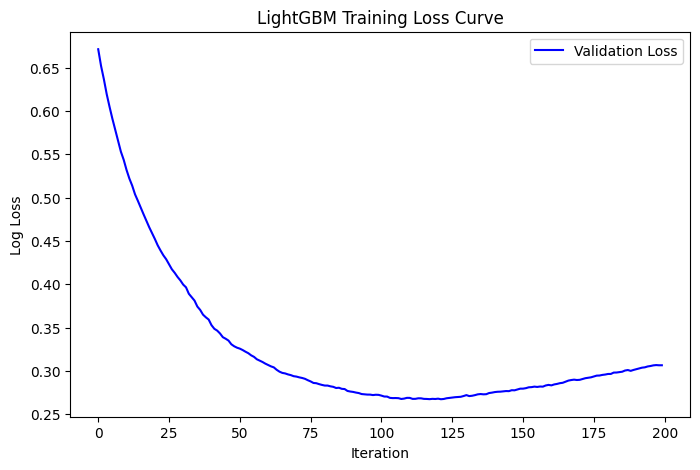

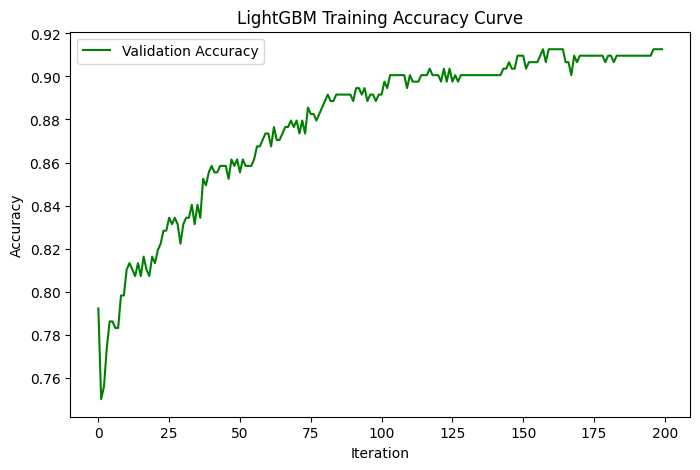

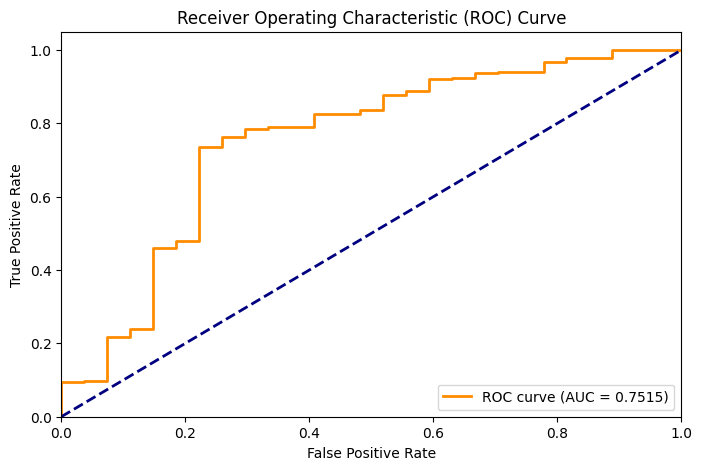

In [30]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Handle Class Imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Define LightGBM Model
lgb_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    is_unbalance=True,
    scale_pos_weight=np.bincount(y_resampled)[0] / np.bincount(y_resampled)[1],
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.05,
    n_estimators=200,
    random_state=42
)

# Step 4: Train the Model & Track Loss and Accuracy
evals_result = {}  # Dictionary to store evaluation results
lgb_model.fit(
    X_resampled, y_resampled,
    eval_set=[(X_test, y_test)],
    eval_metric=['logloss', 'error'],  # Track log loss & error rate
    callbacks=[lgb.record_evaluation(evals_result)]
)

# Step 5: Make Predictions
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]  # Get probability scores for ROC curve

# Step 6: Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'\n LightGBM Model Accuracy: {accuracy:.4f}\n')
print('Confusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', report)

# Step 7: Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(evals_result["valid_0"]["binary_logloss"], label="Validation Loss", color="blue")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("LightGBM Training Loss Curve")
plt.legend()
plt.show()

# Step 8: Plot Accuracy Curve (1 - Error Rate)
plt.figure(figsize=(8, 5))
accuracy_curve = [1 - e for e in evals_result["valid_0"]["binary_error"]]  # Convert error rate to accuracy
plt.plot(accuracy_curve, label="Validation Accuracy", color="green")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("LightGBM Training Accuracy Curve")
plt.legend()
plt.show()

# Step 9: Plot ROC & AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



LIME INTERPRETATION

In [32]:
# LIME Explanation for LightGBM
import lime
import lime.lime_tabular
import numpy as np

# Convert test set to NumPy array
X_test_array = X_test.values

# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=["No CKD", "CKD"],
    mode='classification'
)

# Choose the instance index you want to explain
i = 0  # First instance

# Explain the prediction
exp = explainer.explain_instance(
    data_row=X_test_array[i],
    predict_fn=lgb_model.predict_proba,
    num_features=10  # Show top 10 important features
)

# Save the explanation as HTML and open in browser
file_path = f'lime_explanation_instance_{i}.html'
exp.save_to_file(file_path)

import webbrowser
webbrowser.open(file_path)


d:\8th Semester\testing\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


True